#  Intro I.A. - Trabajo Práctico Nº 2

**Autor**: Julio Donadello  
**Correo**: juliodonadello@gmail.com

---

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

### Apertura del dataset

In [166]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [167]:
california_housing = fetch_california_housing()

In [168]:
# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [169]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
correlation_matrix = df_california.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


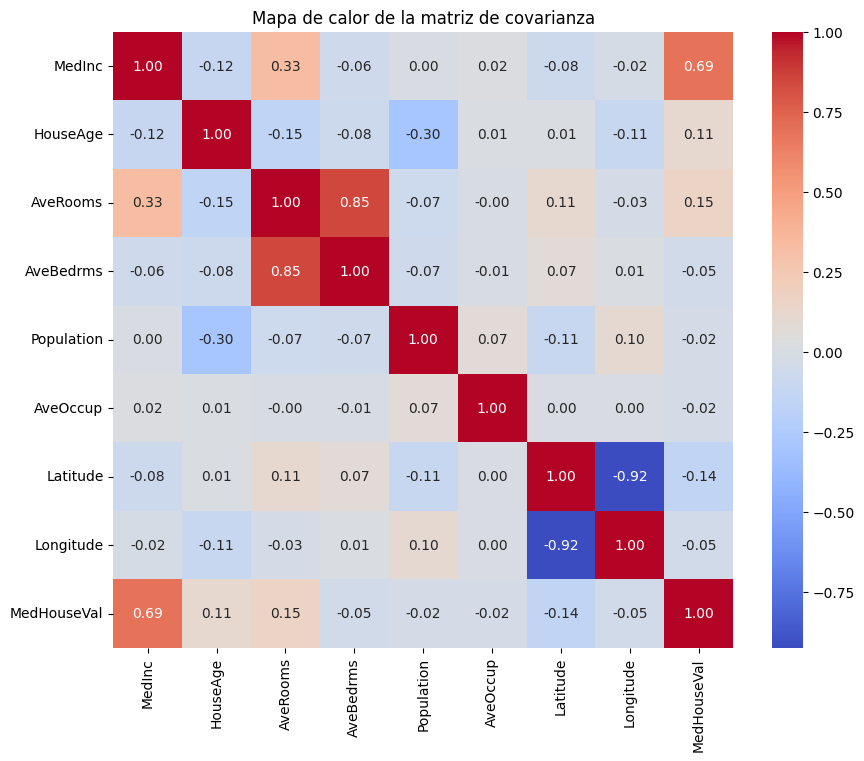

In [170]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de covarianza')
plt.show()

1. (Rta)  
    De la matriz de correlación o covarianza se puede ver que el feature con mayor atributo correlación lineal con el target es **MedInc**.  
    Así mismo, los atributos que parecen estar más correlacionados entre sí son **Latitude** y **Longitude**, seguidos por **AveRooms** y **AveBedrms**. 

---

2. Graficar los histogramas de los diferentes atributos y el target.  
- A) ¿Qué tipo de forma de histograma se observa?  
- B) ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

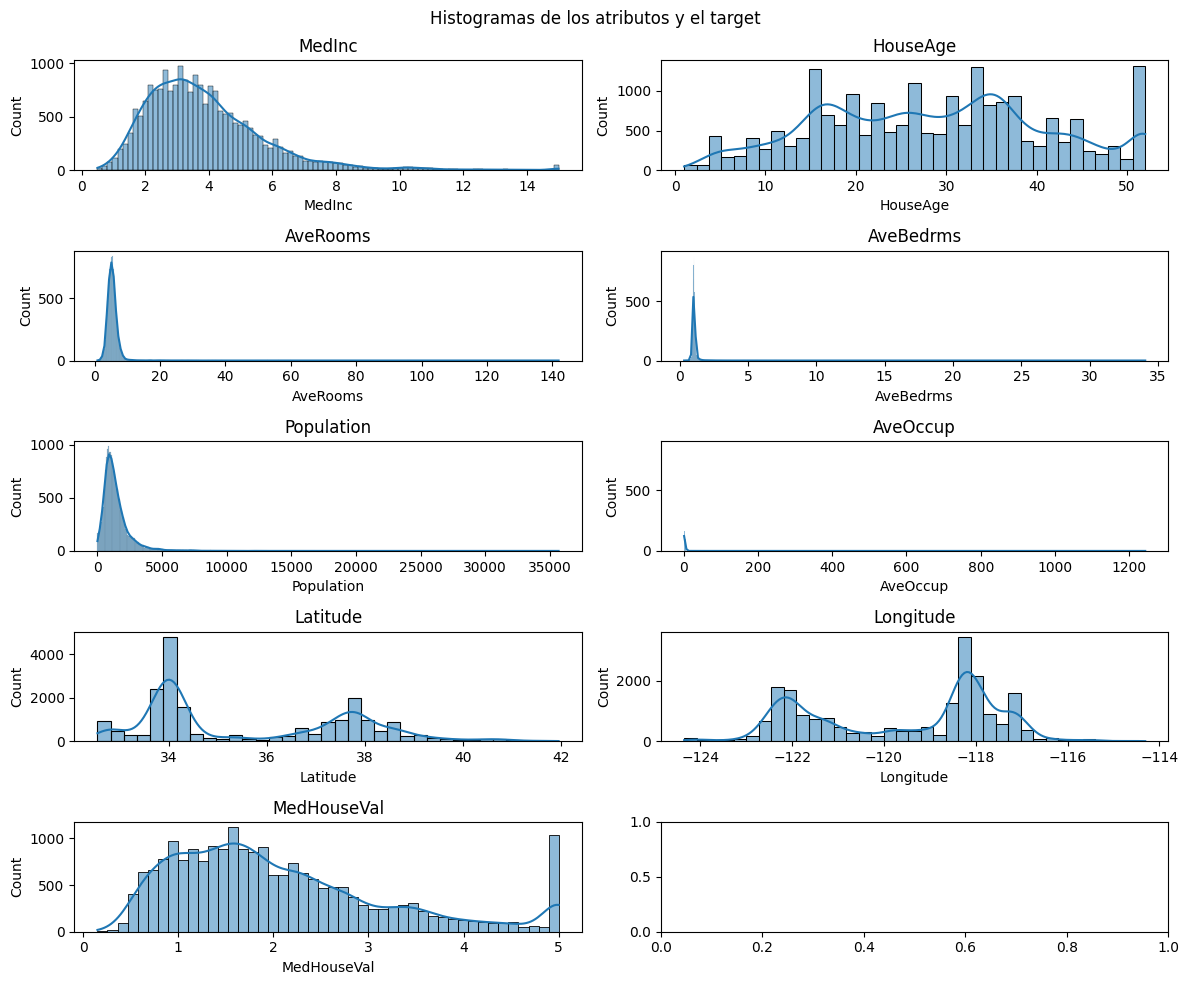

In [171]:
fig, axs = plt.subplots(5, 2, figsize=(12, 10))
fig.suptitle('Histogramas de los atributos y el target')

for i, column in enumerate(df_california.columns):
    ax = axs[i // 2, i % 2]
    #ax.hist(df_california[column], bins=200, alpha=0.5)
    sns.histplot(df_california[column], ax=ax, kde=True)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### Escalamiento del gráfico 
Para ver una variación en la visualización de las distribuciones ya que no se logra apreciar el tipo de distribución en algunos casos.

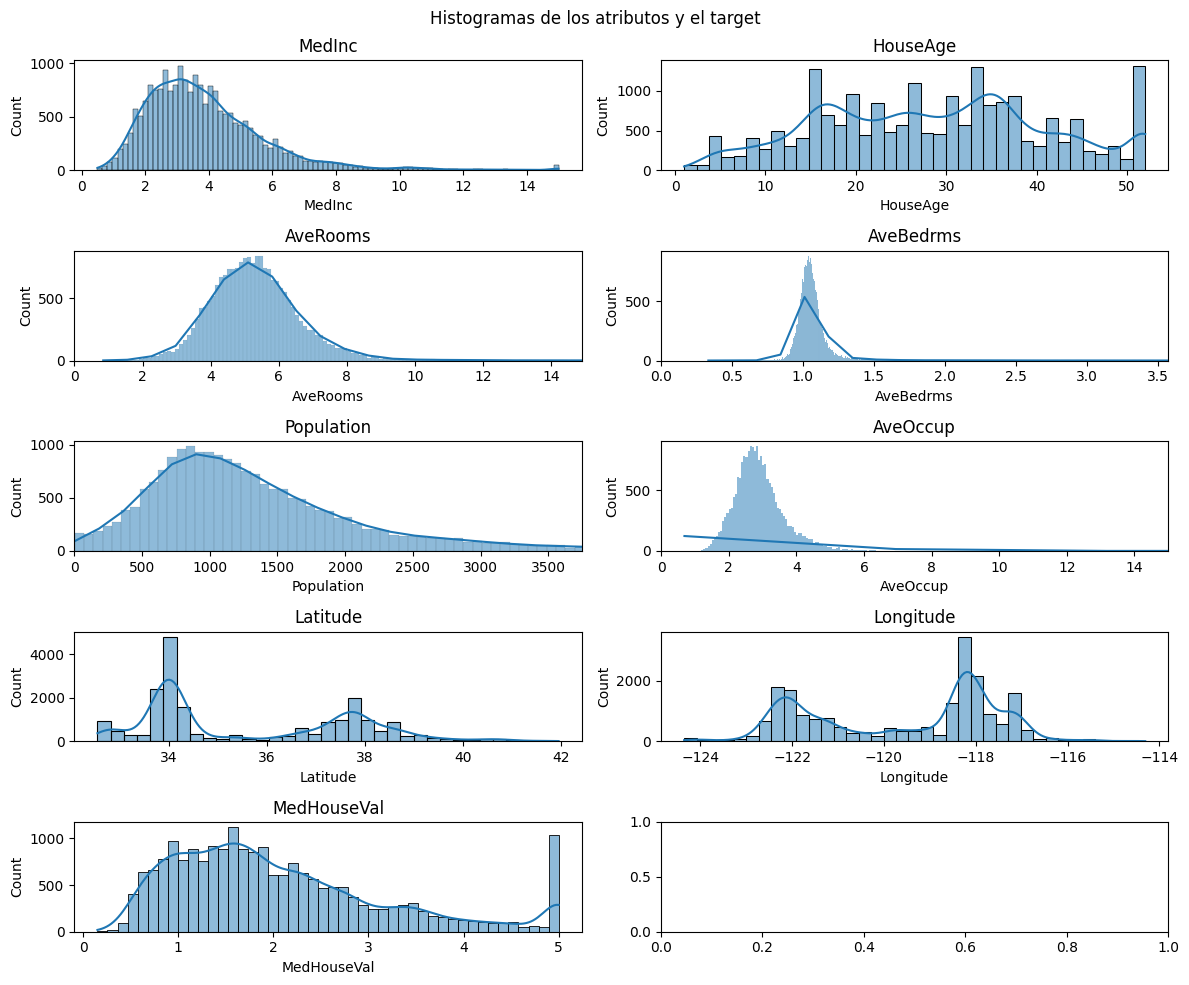

In [172]:
fig, axs = plt.subplots(5, 2, figsize=(12, 10))
fig.suptitle('Histogramas de los atributos y el target')

for i, column in enumerate(df_california.columns):
    ax = axs[i // 2, i % 2]
    #ax.hist(df_california[column], bins=200, alpha=0.5)
    sns.histplot(df_california[column], ax=ax, kde=True)
    ax.set_title(column)

    # Ajusto el eje x para los subplots: (2,1), (2,2), (3,1) y (3,2)

    if (i // 2 == 1 and i % 2 == 0) or (i // 2 == 1 and i % 2 == 1) or (i // 2 == 2 and i % 2 == 0):
        xlim = ax.get_xlim()
        # Calculamos el nuevo límite del eje x como el 30% del máximo actual
        new_xlim = (0, xlim[1] * 0.1)
        ax.set_xlim(new_xlim)

    if (i // 2 == 2 and i % 2 == 1): # AveOccup
        new_xlim = (0, 15)
        ax.set_xlim(new_xlim)

plt.tight_layout()
plt.show()

Se puede observar como la linea de tendencia nativa de Seaborn no logra recrear la distribución por los outliers que se posee en el dataset para algunos features.

2. (Rta) 
- A) y B)
 Se observan distribuciones normales bien definidas en la mayoría de los casos como en los casos de los features: MedInc, Population y AveRooms con media centrada hacia la izquierda. Esto nos indica que hay outliers con valores altos respecto del valor de la media.  
 Por otro lado, hay features que tiene valores mas distribuidos a lo largo del eje x, como son la latitud y longuitud (que poseen un distribución de doble campana gausseana) y houseAge (que de distribuye bastante uniformemente con picos cada 20 años). La naturaleza de estos features no les permite tenes outliers muy notorios.

---

3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

### Preparacion de los sets de entrenamiento y testing

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [175]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## no es necesario escalar los targets

X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

In [176]:
a = len(X_train_scaled)
b = len(X_test_scaled)
print(a,b,a/(a+b))

14448 6192 0.7


### Validacion de nulos y tipos de campos

In [177]:
X_train_scaled.info(), 
print(" ")
print("-------------------------")
print(" ")
y_train.info()
# no se observan inconsistencias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14448 non-null  float64
 1   HouseAge    14448 non-null  float64
 2   AveRooms    14448 non-null  float64
 3   AveBedrms   14448 non-null  float64
 4   Population  14448 non-null  float64
 5   AveOccup    14448 non-null  float64
 6   Latitude    14448 non-null  float64
 7   Longitude   14448 non-null  float64
dtypes: float64(8)
memory usage: 903.1 KB
 
-------------------------
 
<class 'pandas.core.series.Series'>
Index: 14448 entries, 7061 to 15795
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
14448 non-null  float64
dtypes: float64(1)
memory usage: 225.8 KB


### Entrenamiento  
Con los datos de train escalados. No es necesario escalar los datos de **y** ya que el ajuste de los coeficientes debe producir la misma salida y_pred lo más parecida a la variable objetivo y posible. 

In [178]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Predicción

Reproducimos la variable objetivo, trabajando sobre el set de entrenamiento para hallar la varianza total del modelo.

In [179]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array([2.13761366, 1.76385736, 2.75114302, ..., 2.03900584, 2.84130506,
       2.27916759])

### Calculo de varianzas

In [180]:
import numpy as np

In [181]:
S_t = np.var(y_train) # varianza total del modelo
S_r = np.var(y_pred_train) # varianza explicada con el modelo
S_e = S_t - S_r # varianza de los residuos
S_t,S_r,S_e

(1.3396959774719193, 0.8163383486451457, 0.5233576288267736)

Para evaluar la captura del target, se va a utilizar una medida general ampliamente conocida: RMSE (Raíz cuadrada del error cuadrático medio) en donde la resta para llegar al residuo se da entre y_train e y_pred.  

La selección de esta métrica es debido al caso de uso. El MSE (así como el RMSE) castigan a los residuos más grandes ya que aporta cuadráticamente. En este caso nos interesa ver si se devía mucho en la predicción del precio de la vivienda (MedHouseVal) más que ver cuantas veces se desvió por poca diferencia.

In [182]:
from sklearn.metrics import mean_squared_error

In [183]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE:",rmse)

RMSE: 0.7234346057708156


In [184]:
y_train[55],y_pred_train[55],y_pred_train[55]/y_train[55] #caso random

(0.831, 1.3508640934767746, 1.625588560140523)

3. (Rta)  
    Se obtuvo un valor muy alto de RMSE, lo que nos dice que tenemos un 72% de error de media en cada prediccón. Por ende el modelo no está pudiendo capturar el comportamiento del target a la hora de hacer el predict si consideramos el cuadrado del residuo como métrica de evaluación.  

    Y este desvío en la predicción no se lo puede atribuir a la varianza del dataset ya que estamos prediciendo con el set de training. Si la captura del comportamiento del target (usando los features) hubiese sido posible con una regresión lineal, la predicción con el set de entrenamiento debe dar muy bien ya que son los datos con los que entrenó el modelo.

---

4. Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [185]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [186]:
from sklearn.metrics import mean_absolute_error,r2_score

In [190]:
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.5305677824766752
MAE: 0.5272474538305952
R²: 0.5957702326061665


---

5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α.

In [188]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [193]:
alpha_values = np.linspace(0, 12.5, 100)
MSE = []

### Entrenando   
Con estimador por regresion ridge mediante crossvalidation de 5 folds.

In [194]:
for alpha in alpha_values:
    # Creamos un modelo
    ridge_model = Ridge(alpha=alpha)
    
    # Este la forma que se implementa en scikit-learn
    cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

    MSE.append((-1)*cv.mean())

### Paralelizando el calculo de MSE

In [197]:
MSE = []
for alpha in alpha_values:
    # Creamos un modelo
    ridge_model = Ridge(alpha=alpha)
    
    # Este la forma que se implementa en scikit-learn
    cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=1)

    MSE.append((-1)*cv.mean())

In [207]:
min_index = MSE.index(min(MSE))
best_alpha = alpha_values[min_index] # mejor regresión de Ridge

### MSE vs alpha_values

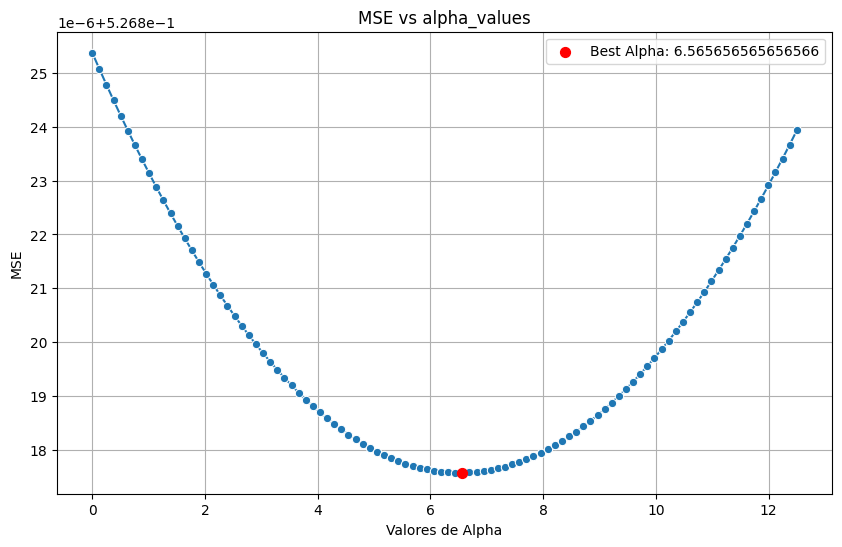

In [220]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_values, y=MSE, marker='o')
plt.title('MSE vs alpha_values')
plt.xlabel('Valores de Alpha')
plt.ylabel('MSE')
plt.grid(True)

# Dibujar un punto rojo en el best_alpha
plt.scatter(best_alpha, min(MSE), color='red', s=50, zorder=10, label=f'Best Alpha: {best_alpha}')
plt.legend()

plt.show()

---

6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [214]:
liner_model = LinearRegression()
best_Ridge_model = Ridge(alpha=6.565656)

liner_model.fit(X=X_train_scaled, y=y_train)
best_Ridge_model.fit(X=X_train_scaled, y=y_train)

Ridge(alpha=6.565656)

In [215]:
y_pred_linear = liner_model.predict(X_test_scaled)
y_pred_Ridge = best_Ridge_model.predict(X_test_scaled)

#### Metricas modelo lineal

In [216]:
print("MSE:",mean_squared_error(y_test, y_pred_linear))
print("MAE:",mean_absolute_error(y_test, y_pred_linear))

MSE: 0.5305677824766752
MAE: 0.5272474538305952


#### Metricas modelo Ridge

In [217]:
print("MSE:",mean_squared_error(y_test, y_pred_Ridge))
print("MAE:",mean_absolute_error(y_test, y_pred_Ridge))

MSE: 0.5304149219359128
MAE: 0.527221708238119


In [219]:
# Prueba de metricas con un mal regresor Ridge
bad_Ridge_model = Ridge(alpha=1)
bad_Ridge_model.fit(X=X_train_scaled, y=y_train)
y_pred_bad_Ridge = bad_Ridge_model.predict(X_test_scaled)
print("MSE:",mean_squared_error(y_test, y_pred_Ridge))
print("MAE:",mean_absolute_error(y_test, y_pred_Ridge))

MSE: 0.5304149219359128
MAE: 0.527221708238119


In [221]:
# Prueba de metricas con un mal regresor Ridge
bad_Ridge_model = Ridge(alpha=12)
bad_Ridge_model.fit(X=X_train_scaled, y=y_train)
y_pred_bad_Ridge = bad_Ridge_model.predict(X_test_scaled)
print("MSE:",mean_squared_error(y_test, y_pred_Ridge))
print("MAE:",mean_absolute_error(y_test, y_pred_Ridge))

MSE: 0.5304149219359128
MAE: 0.527221708238119


6.  (Rta)  
    Considerando MSE y MAE el modelo mejora muy levemente al pasar de un regresor lineal a un regresor Ridge. Esto se debe a la adición del termino de penalización o encojimiento que se utiliza para disminuir los coeficientes que no explican el target.  
    Comparando el mejor regresor ridge con el peor, las métricas de evaluación no variaron. Esto nos indica que estamos trabajando sobre la condición de contorno (restricción) en la que se basa la regresión.  
    Probando con un regresor Lasso, el cual tiene otra restricción, se puede llegar a ver variaciones en las métricas al tomar disintos valores de alfa.